https://github.com/ReFirmLabs/binwalk/blob/master/INSTALL.md

**Binwalk**, firmware analizi ve benzeri görevler için vazgeçilmez kılan çeşitli özelliklere sahiptir. İşte bazı temel yetenekleri:

**a. İmza Tarama:** Binwalk, ikili veri içinde bilinen dosya türlerini, başlıkları ve dipnotları tanımlamak için imza tabanlı tarama kullanır.

**b. Dosya Çıkarma:** Binwalk, ikili veriden gömülü dosyaları çıkarma yeteneğine sahiptir. Bu özellik, firmware bileşenlerini, görüntüleri ve diğer gizli verileri dosyaların içinden almanıza yardımcı olur.

**c. Sıkıştırma Analizi:** Binwalk, ikili dosyaları analiz ederek kullanılan sıkıştırma algoritmalarını ve tekniklerini belirleyebilir. Bu özellik, verinin firmware görüntüleri içinde nasıl sıkıştırıldığını anlamak için önemlidir.

**d. Entropi Analizi:** Binwalk, ikili dosyalar içindeki verinin rastgeleliğini veya tahmin edilebilirliğini değerlendirmek için entropi hesaplar. Bu analiz, şifrelenmiş veya sıkıştırılmış bölümleri tanımlamak için kullanışlıdır.

**e. Dosya Sistemi Çıkarma:** Binwalk, ikili veri içinde gömülü dosya sistemlerini tanıyabilir ve çıkarabilir. Bu özellik, firmware görüntülerindeki dosya sistemlerinin yapısını çıkarmak ve analiz etmek için önemlidir.

**f. Özel İmza Oluşturma:** Kullanıcılar, özel imzalar oluşturarak Binwalk'ın belirli dosya türlerini veya desenleri tanıma yeteneğini geliştirebilirler.

**g. Ters Mühendislik Desteği:** Binwalk, araştırmacılara ikili dosyaların yapısını ve içeriğini analiz etmelerinde yardımcı olur. Bu özellik, özellikle firmware güvenliği alanında, ters mühendislik süreçlerinde değerlidir.

**h. Python API:** Binwalk, kullanıcılara Python API sağlar, böylece kendi betiklerini ve araçlarını Binwalk'ın özellikleriyle entegre etme olanağı sunar. Bu özellik, firmware analizi iş akışlarında esneklik ve özelleştirme sağlar.

Genel olarak, Binwalk, ikili verinin analizi, çıkartılması ve anlaşılmasında, özellikle firmware güvenliği ve ters mühendislik bağlamında kilit bir rol oynayan çok yönlü bir araçtır.


In [ ]:
! sudo apt-get -y update

In [ ]:
! pip install gdown

In [ ]:
import gdown
drive_folder = "https://drive.google.com/drive/folders/1PfJhsekrCgf6bZducCcAfncsLBkOBzxM"
gdown.download_folder(url=drive_folder,remaining_ok=True, quiet=True)

['/content/images/bowser.jpg',
 '/content/images/carving.jpg',
 '/content/images/example.jpg',
 '/content/images/moon.png',
 '/content/images/stg200_m.jpg']

In [ ]:
! sudo apt-get -y install binwalk

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
binwalk is already the newest version (2.3.3+dfsg1-2).
The following packages were automatically installed and are no longer required:
  fonts-lyx freeglut3 libevdev2 libglu1-mesa libgudev-1.0-0 libimagequant0
  libinput-bin libinput10 liblbfgsb0 libmd4c0 libmtdev1 libqt5core5a
  libqt5dbus5 libqt5designer5 libqt5gui5 libqt5help5 libqt5network5
  libqt5opengl5 libqt5printsupport5 libqt5sql5 libqt5sql5-sqlite libqt5svg5
  libqt5test5 libqt5widgets5 libqt5xml5 libraqm0 libwacom-bin libwacom-common
  libwacom9 libxcb-icccm4 libxcb-image0 libxcb-keysyms1 libxcb-render-util0
  libxcb-util1 libxcb-xinerama0 libxcb-xinput0 libxcb-xkb1 libxkbcommon-x11-0
  libxsimd-dev pyqt5-dev-tools python-matplotlib-data python3-appdirs
  python3-attr python3-beniget python3-brotli python3-bs4 python3-chardet
  python3-cycler python3-dateutil python3-decorator python3-fs python3-gast
  python3-html5lib python3-k

In [ ]:
! binwalk


Binwalk v2.3.3
Craig Heffner, ReFirmLabs
https://github.com/ReFirmLabs/binwalk

Usage: binwalk [OPTIONS] [FILE1] [FILE2] [FILE3] ...

Signature Scan Options:
    -B, --signature              Scan target file(s) for common file signatures
    -R, --raw=<str>              Scan target file(s) for the specified sequence of bytes
    -A, --opcodes                Scan target file(s) for common executable opcode signatures
    -m, --magic=<file>           Specify a custom magic file to use
    -b, --dumb                   Disable smart signature keywords
    -I, --invalid                Show results marked as invalid
    -x, --exclude=<str>          Exclude results that match <str>
    -y, --include=<str>          Only show results that match <str>

Extraction Options:
    -e, --extract                Automatically extract known file types
    -D, --dd=<type[:ext[:cmd]]>  Extract <type> signatures (regular expression), give the files an extension of <ext>, and execute <cmd>
    -M, --matryos

In [ ]:
! file ./images/moon.png

./images/moon.png: PNG image data, 600 x 593, 8-bit/color RGB, non-interlaced


In [ ]:
! binwalk ./images/moon.png


DECIMAL       HEXADECIMAL     DESCRIPTION
--------------------------------------------------------------------------------
0             0x0             PNG image, 600 x 593, 8-bit/color RGB, non-interlaced
944           0x3B0           Zlib compressed data, best compression
411781        0x64885         Zip archive data, encrypted at least v1.0 to extract, compressed size: 35, uncompressed size: 23, name: flag.txt
411976        0x64948         End of Zip archive, footer length: 22



In [ ]:
! dd if=./images/moon.png of=./moon.zip skip=411781 bs=1

217+0 records in
217+0 records out
217 bytes copied, 0.00141045 s, 154 kB/s


In [ ]:
! unzip -P moon moon.zip

In [ ]:
! cat flag.txt

sun{0kay_it_is_a_m00n}


In [ ]:
! binwalk -y moon.png

Extraction Options:
    
*   -e, --extract                Automatically extract known file types
*   -M, --matryoshka             Recursively scan extracted files


    

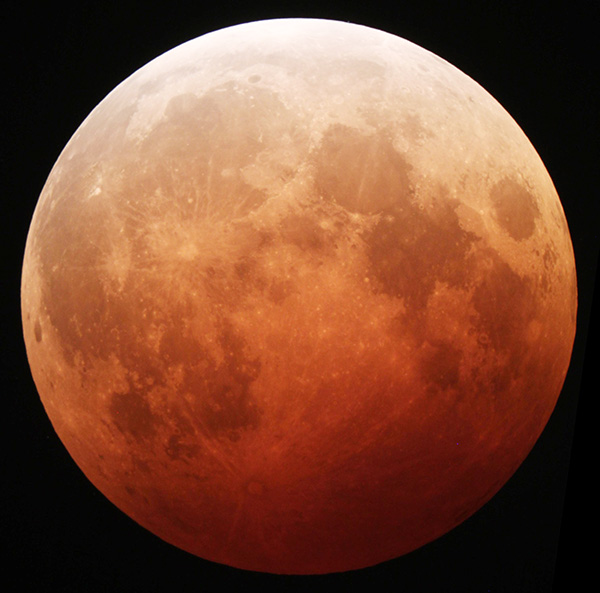

In [ ]:
from IPython.display import Image
Image("./images/moon.png")

In [ ]:
! binwalk --run-as=root -e ./images/moon.png


DECIMAL       HEXADECIMAL     DESCRIPTION
--------------------------------------------------------------------------------
0             0x0             PNG image, 600 x 593, 8-bit/color RGB, non-interlaced
944           0x3B0           Zlib compressed data, best compression
411781        0x64885         Zip archive data, encrypted at least v1.0 to extract, compressed size: 35, uncompressed size: 23, name: flag.txt
411976        0x64948         End of Zip archive, footer length: 22



In [ ]:
from IPython.display import Image
Image("./images/example.jpg")

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
! binwalk --run-as=root -e ./images/example.jpg


DECIMAL       HEXADECIMAL     DESCRIPTION
--------------------------------------------------------------------------------
0             0x0             JPEG image data, EXIF standard
12            0xC             TIFF image data, big-endian, offset of first image directory: 8
9298          0x2452          TIFF image data, little-endian offset of first image directory: 662
9692          0x25DC          JPEG image data, JFIF standard 1.01
14241         0x37A1          Copyright string: "Copyright 2003 Apple Computer Inc., all rights reserved."
1972141       0x1E17AD        Zip archive data, at least v1.0 to extract, compressed size: 20, uncompressed size: 20, name: secret.txt
1972309       0x1E1855        End of Zip archive, footer length: 22



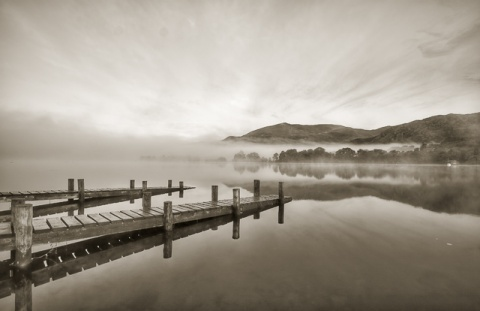

In [ ]:
from IPython.display import Image
Image("./images/stg200_m.jpg")

In [ ]:
! binwalk --run-as=root -e ./images/stg200_m.jpg


DECIMAL       HEXADECIMAL     DESCRIPTION
--------------------------------------------------------------------------------
0             0x0             JPEG image data, JFIF standard 1.01
36387         0x8E23          Zip archive data, at least v2.0 to extract, compressed size: 45, uncompressed size: 50, name: answer.txt
36580         0x8EE4          End of Zip archive, footer length: 22



In [ ]:
! unzip ./_stg200_m.jpg-0.extracted/8E23.zip

Archive:  ./_stg200_m.jpg-0.extracted/8E23.zip
  inflating: answer.txt              


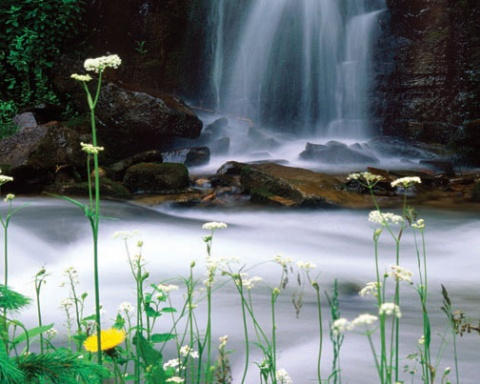

In [ ]:
from IPython.display import Image
Image("./images/carving.jpg")

In [ ]:
! binwalk --run-as=root -e ./images/carving.jpg


DECIMAL       HEXADECIMAL     DESCRIPTION
--------------------------------------------------------------------------------
0             0x0             JPEG image data, JFIF standard 1.01
75733         0x127D5         Zip archive data, at least v2.0 to extract, compressed size: 66, uncompressed size: 67, name: answer.txt
75947         0x128AB         End of Zip archive, footer length: 22



In [ ]:
! xxd carving.jpg

00000000: ffd8 ffe0 0010 4a46 4946 0001 0100 0001  ......JFIF......
00000010: 0001 0000 fffe 003b 4352 4541 544f 523a  .......;CREATOR:
00000020: 2067 642d 6a70 6567 2076 312e 3020 2875   gd-jpeg v1.0 (u
00000030: 7369 6e67 2049 4a47 204a 5045 4720 7636  sing IJG JPEG v6
00000040: 3229 2c20 7175 616c 6974 7920 3d20 3935  2), quality = 95
00000050: 0aff db00 4300 0201 0101 0101 0201 0101  ....C...........
00000060: 0202 0202 0204 0302 0202 0205 0404 0304  ................
00000070: 0605 0606 0605 0606 0607 0908 0607 0907  ................
00000080: 0606 080b 0809 0a0a 0a0a 0a06 080b 0c0b  ................
00000090: 0a0c 090a 0a0a ffdb 0043 0102 0202 0202  .........C......
000000a0: 0205 0303 050a 0706 070a 0a0a 0a0a 0a0a  ................
000000b0: 0a0a 0a0a 0a0a 0a0a 0a0a 0a0a 0a0a 0a0a  ................
000000c0: 0a0a 0a0a 0a0a 0a0a 0a0a 0a0a 0a0a 0a0a  ................
000000d0: 0a0a 0a0a 0a0a 0a0a 0a0a 0aff c000 1108  ................
000000e0: 0180 01e0 0301 2200 0211 0103 1101 ffc

In [ ]:
! printf '%d\n' 0x00008e23

36387


In [ ]:
! dd if=carving-ex.jpg bs=1 skip=36387 of=foo.zip

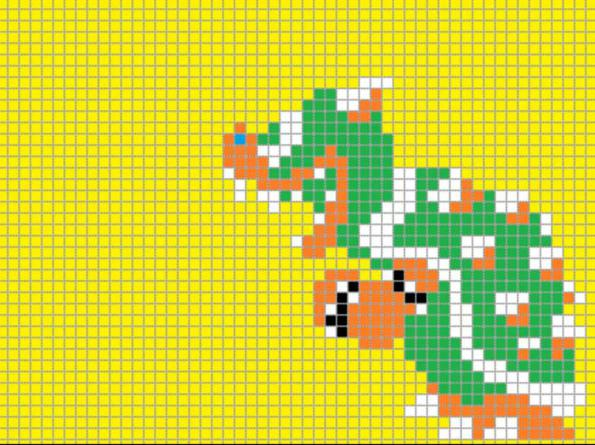

In [ ]:
from IPython.display import Image
Image("./images/bowser.jpg")

In [ ]:
! binwalk --run-as=root -e ./images/bowser.jpg


DECIMAL       HEXADECIMAL     DESCRIPTION
--------------------------------------------------------------------------------
0             0x0             JPEG image data, JFIF standard 1.01



## Entropi Analizi:

Entropi analizi, bir veri setindeki bölümlerin entropisini hesaplayarak sıkıştırılmış veya şifrelenmiş alanların belirlenmesine yardımcı olur. Entropi, verinin içindeki rastgelelik veya düzensizlik düzeyini ölçen bir kavramdır. Yüksek entropi, verinin daha rastgele ve düzensiz olduğunu gösterirken, düşük entropi, verinin daha düzenli ve öngörülebilir olduğunu gösterir.

Binwalk, entropi analizi kullanarak ikili veri içindeki bölgelerin rastgelelik veya düzenlilik derecesini değerlendirir. Bu sayede, sıkıştırılmış veya şifrelenmiş alanları belirlemede yardımcı olur. Özellikle firmware analizinde, entropi analizi, potansiyel olarak kritik olan bu tür alanları tespit etmek açısından önemlidir.

Entropi analizi sonuçları, kullanıcıya ikili verinin hangi alanlarının sıkıştırma veya şifreleme içerebileceği konusunda bir anlayış kazandırır. Bu durum, Binwalk'ı özellikle güvenlik araştırmacıları ve firmware analistleri için güçlü bir araç haline getirir.

In [ ]:
# Solution for NameError: name 'np' is not defined
! sudo apt remove python3-numpy
! pip3 install numpy

In [ ]:
! binwalk -E ./images/moon.png

## Kaynaklar

1.   https://sunshinectf.org/
2.   https://0day.work/sunshine-ctf-2016-writeups/

